# Model for predicting fraudulent transactions for a financial company
# By- KSHITEEJ CHOURASIA

In [1]:
# importing of libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# loading of data
data=pd.read_csv('C:\\Users\\91912\\Desktop\\ppt\\LOG_CSV.csv')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Basic Checks

In [4]:
# prints first 5 rows of the data
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# prints last5 rows of the data
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [6]:
# used to view some basic statistical details like percentile, mean, std etc
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
# it shows the number columns and rows that data consists
data.shape

(6362620, 11)

# Domain Analysis

In [9]:
# displays all the columns
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# Data Preprocessing
## 1. Data cleaning including missing values, outliers.

In [10]:
data.isnull().values.any()

False

In [11]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
## detect missing values in the given series object. 
## It return a boolean same-sized object indicating if the values are NA. 
## Missing values gets mapped to True and non-missing value gets mapped to False 
data.isna().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [13]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [14]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [15]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [16]:
dfisFraud = data.loc[data.isFraud == 1]
dfisFraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [17]:
dataflagfraud= data.loc[data.isFlaggedFraud == 1]
dataflagfraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [18]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


There are too much of outliers so we cannot impute them.. we have to take outliers as a our original data

# Exploratory Data Analysis

In [20]:
##coverting categorical features to numerical
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data.type=label.fit_transform(data.type)
data.nameOrig=label.fit_transform(data.nameOrig)
data.nameDest=label.fit_transform(data.nameDest)

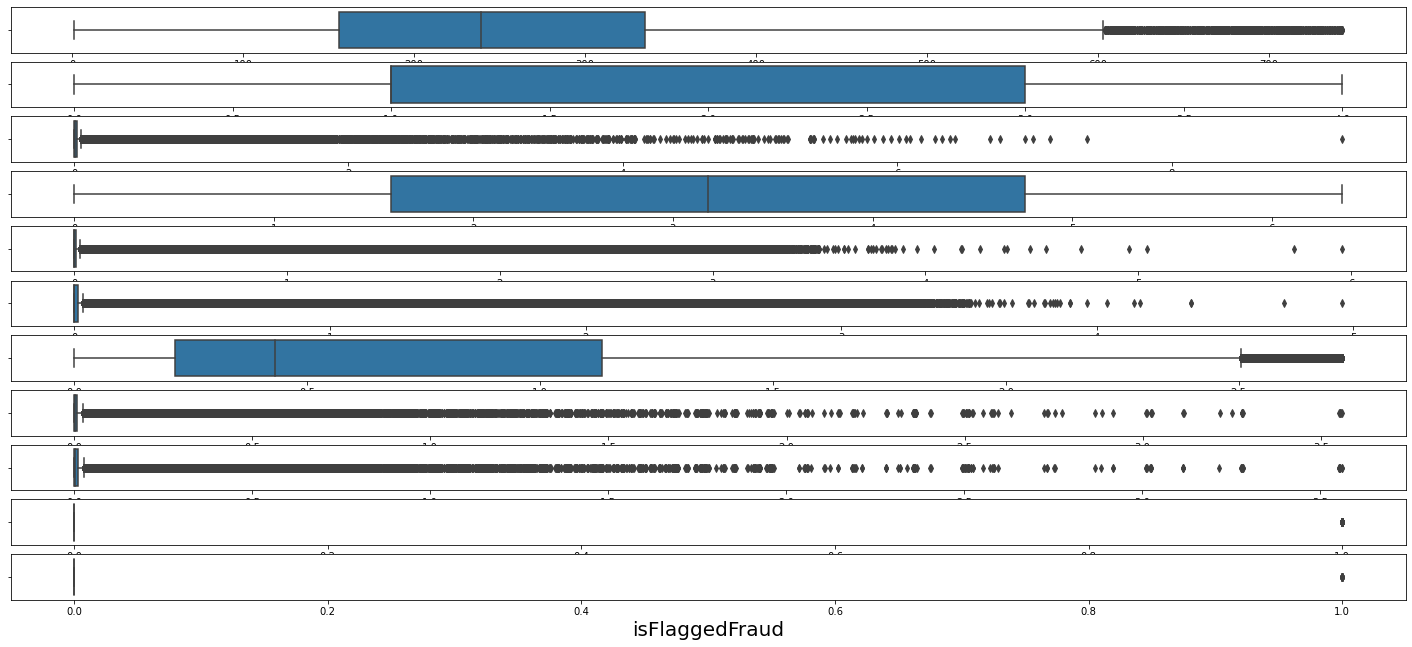

In [21]:
## checking the outliers if any
## outliers detection can be normally plotted using boxplot
box=data[['step', 'type', 'amount', 'nameOrig', 
          'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
plt.figure(figsize=(25,25), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=25 :     
        ax = plt.subplot(25,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [22]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


# Feature Selection

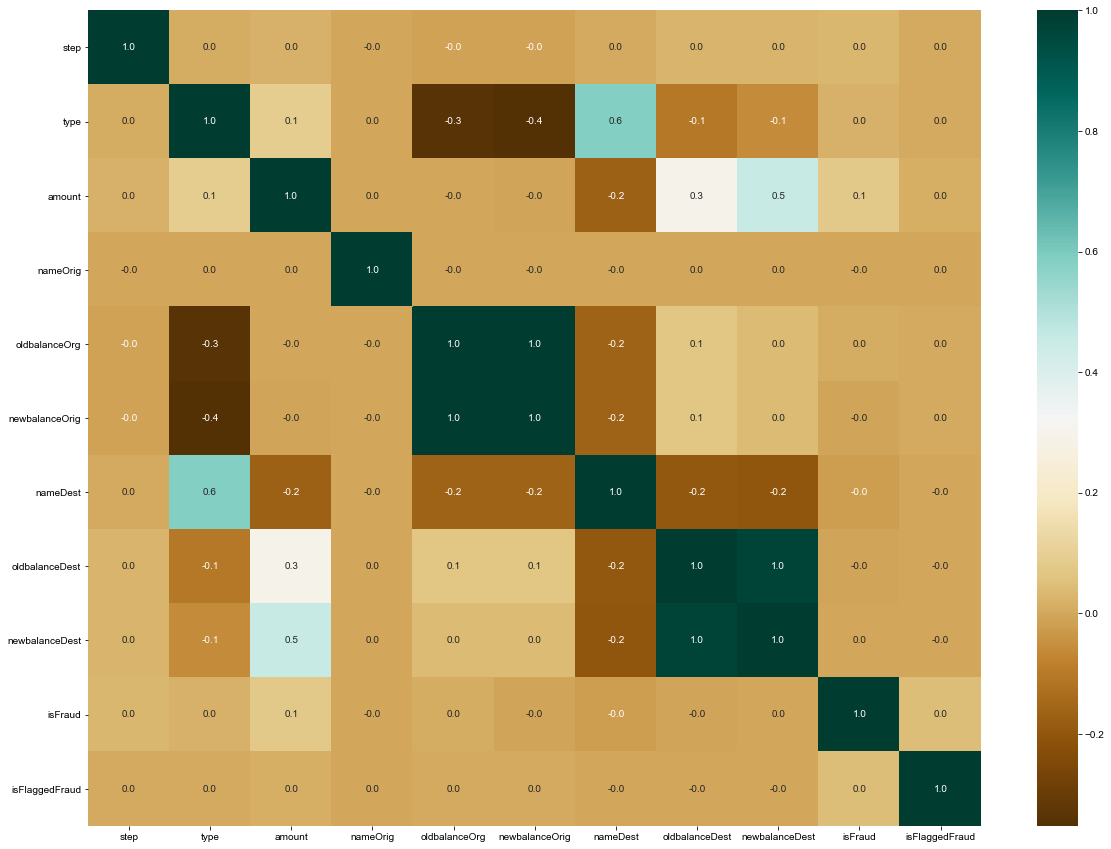

In [24]:
##cmap stands for colormap and it's a colormap instance or registered colormap name
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, fmt= '.1f', cmap="BrBG")
sns.set(font_scale=2.25)
plt.show()

In [25]:
## displays the correlated data 
corr_matrix = data.corr()
corr_matrix["isFlaggedFraud"].sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
type              0.002685
nameOrig          0.000667
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
nameDest         -0.001122
Name: isFlaggedFraud, dtype: float64

3. How did you select variables to be included in the model?
checking correlation btw target variable with remaining variable

5. What are the key factors that predict fraudulent customer?
key factors that predict fraudulent customer are isFraud and amount

6. Do these factors make sense? If yes, How? If not, How not?
yes,they make sense,if the amount is more we can assume it may be fraud and if isfraud is 1, the chances of its isFlaggedFraud is more.

# Model Building

In [26]:
##creating independent and dependent variables X & y
X = data.loc[:,['isFraud','amount','oldbalanceOrg','newbalanceOrig','step','type','nameOrig']]
y = data.isFlaggedFraud

In [27]:
X.head()

,isFraud,amount,oldbalanceOrg,newbalanceOrig,step,type,nameOrig
0,0,9839.64,170136.0,160296.36,1,3,757869
1,0,1864.28,21249.0,19384.72,1,3,2188998
2,1,181.00,181.0,0.00,1,4,1002156
3,1,181.00,181.0,0.00,1,1,5828262
4,0,11668.14,41554.0,29885.86,1,3,3445981


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isFlaggedFraud, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Splitting the data into test and train for calculating accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4453834, 7), (1908786, 7), (4453834,), (1908786,))

In [31]:
from scipy.stats import skew
from scipy.stats import kurtosis

isFraud
769.7023761366951


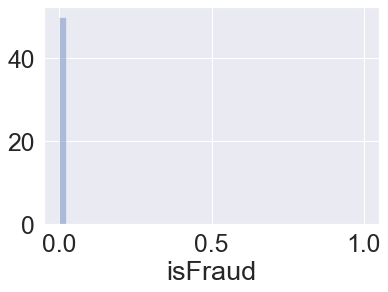

amount
1797.9552914598337


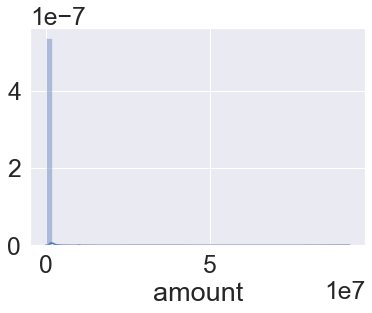

oldbalanceOrg
32.9648516960387


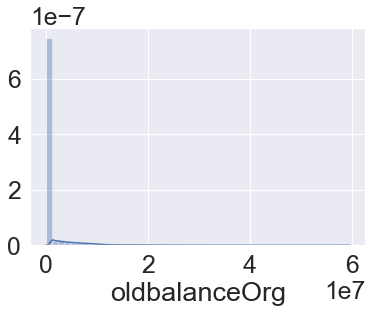

newbalanceOrig
32.06695841776864


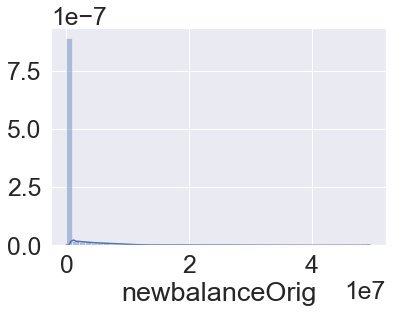

step
0.3290693534211582


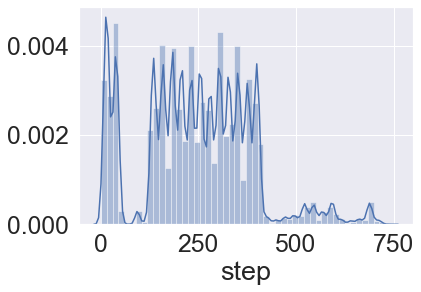

type
-1.4345763413580779


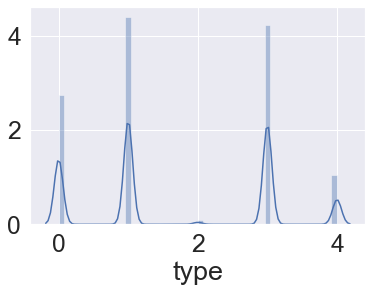

nameOrig
-1.2000279621839782


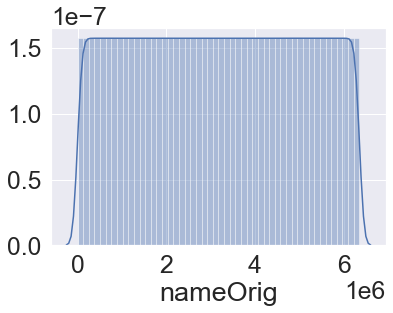

In [32]:
for col in X_train:
    print(col)
    print(kurtosis(data[col]))
    
    plt.figure()
    sns.distplot(data[col])
    plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 2. Describe your fraud detection model in elaboration.
## DECISIONTREE

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
dtree=DecisionTreeRegressor(max_depth=25)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25)

In [36]:
dtree.score(X_train, y_train)

1.0

In [37]:
dtree.score(X_test, y_test)

0.7142846664954787

In [38]:
p_test = dtree.predict(X_test)

In [39]:
def mae(p, t):
    return np.sum(np.abs(p - t)) / len(p)

In [40]:
mae(p_test, y_test)

1.0477863940745583e-06

In [41]:
def print_score(mm):
    print("train r^2 " + str(mm.score(X_train, y_train)))
    print("validation r^2 " + str(mm.score(X_test, y_test)))
    p_test = mm.predict(X_test)
    p_train = mm.predict(X_train)
    print("mean absolute error(Train): " + str(mae(p_train, y_train)))
    print("mean absolute error(Validation): " + str(mae(p_test, y_test)))
print_score(dtree)

train r^2 1.0
validation r^2 0.7142846664954787
mean absolute error(Train): 0.0
mean absolute error(Validation): 1.0477863940745583e-06


In [42]:
p_test = dtree.predict(X_test)

In [43]:
p_test

array([0., 0., 0., ..., 0., 0., 0.])

# 7. What kind of prevention should be adopted while company update its infrastructure?
Set limit to amount transaction, if it extends the limit the person should contact company to verify.

# 8. Assuming these actions have been implemented, how would you determine if they work?
if these actions are implemented,I feel it will work better than current situation.